# 9. 스택, 큐

- Stack: LIFO (Last-In-First-Out, 접시가 쌓인 모습). 요소를 컬렉션에 추가하는 *push()*와 아직 제거되지 않은 가장 최근에 삽입된 요소를 제거하는 *pop()* 연산을 지원하는 추상자료형.

- Queue: FIFO (First-In-First-Out, 사람들이 줄을 선 모습)

- 리스트가 사실상 스택과 큐의 모든 연산을 지원함

- 하지만 리스트는 동적 배열로 구현되어 있어서 큐를 쓸거면 Deque를 쓰는게 좋음

- 스택은 거의 모든 애플리케이션을 만들때 사용되는 자료구조

- 스택과 연관된 알고리즘을 제대로 이해하느냐 못하느냐에 따라서 기본 알고리즘을 설계할 수 있느냐 없느냐가 결정되기도 함.

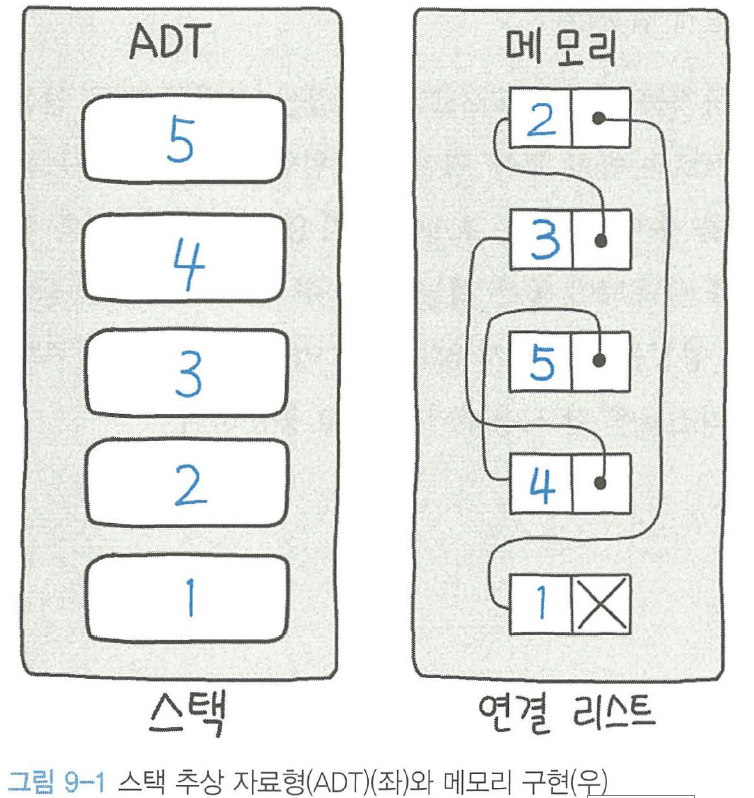

## 9-20: 유효한 괄호

- 괄호로 된 입력값이 올바른지 판별하라.

~~~
입력: ()[]{}

출력: true
~~~

### 풀이: 스택 일치 여부 판별 (using mapping table)

- 괄호의 순서도 중요하기 때문에 이상한게 key로 들어오면 그냥 False 반환하면 됨

In [ ]:
def is_valid(s: str) -> bool:
  input_stack = [] # collect char which is a value
  mapping_table = {
    ')':'(',
    '}':'{',
    ']':'['    
  }
  
  # Use the stack to handle exceptions and determine whether they match.
  # char in mapping_table: compare input with the keys, not values  
  for char in s:
    print("input_stack: ", input_stack)
    # char is not a key
    if char not in mapping_table: # if key (or weird char): false, if value: true
      input_stack.append(char) # append value

    # char is a key
    # empty stack 
    # OR values in the mapping table != popped value  
    elif not input_stack or mapping_table[char] != input_stack.pop():
      return False   

  return len(input_stack) == 0

# output = true
s = "()[]{}"
# s = ")(][}{"


print(is_valid(s))

input_stack:  []
input_stack:  ['(']
input_stack:  []
input_stack:  ['[']
input_stack:  []
input_stack:  ['{']
True


## 9-21: 중복 문자 제거

- 중복된 문자를 제외하고 사전식 순서 (lexicographical order)로 나열하라

e.g.)
~~~
입력: "bcabc"

출력: "abc"
~~~

e.g.)
~~~
입력: "cbacdcbc"

출력: "acdb"
~~~

- 사전식 순서란 사전에서 가장 먼저 찾을 수 있는 문자열 순서를 의미함

  e.g.) ebcabc $→$ eabc (e는 가장 뒤에 있지만 e의 위치를 변경할 수 없기 때문.)

  e.g.) ebcabce $→$ abce

### 풀이 1: 재귀를 이용한 분리

In [ ]:
def remove_duplicate_letters(s: str) -> str:
  # sort using set
  for char in sorted(set(s)):
    # print(char)
    suffix = s[s.index(char):]
    # print(suffix)

    # separate if 
    # print(set(s))
    # print(set(suffix))
    if set(s) == set(suffix):
      return char + remove_duplicate_letters(suffix.replace(char, '')) # backtracking

  return ''

# return = "abc"
# s = "bcabc"

# return = "acdb"
# s = "cbacdcbc"

s = "ebcabc"
print(remove_duplicate_letters(s))

eabc


### 풀이 2: 스택을 이용한 문자 제거

In [ ]:
import collections

def remove_duplicate_letters_2(s: str) -> str:
  counter, seen, stack = collections.Counter(s), set(), []
  
  for char in s:
    # seen
    counter[char] -= 1

    # already seen -> skip
    if char in seen:
      continue
    
    # remove from stack if char is left
    print("char: ", char)
    print("counter: ", counter)
    while stack and char < stack[-1] and counter[stack[-1]] > 0:
      print("stack[-1]: ", stack[-1])
      seen.remove(stack.pop())

    stack.append(char)
    seen.add(char)

    print("stack: ", stack)
    print("seen: ", seen)
    print(" ")

  return ''.join(stack)

# return = "abc"
# s = "bcabc"

# return = "acdb"
s = "cbacdcbc"

# s = "ebcabc"
print(remove_duplicate_letters_2(s))

char:  c
counter:  Counter({'c': 3, 'b': 2, 'a': 1, 'd': 1})
stack:  ['c']
seen:  {'c'}
 
char:  b
counter:  Counter({'c': 3, 'b': 1, 'a': 1, 'd': 1})
stack[-1]:  c
stack:  ['b']
seen:  {'b'}
 
char:  a
counter:  Counter({'c': 3, 'b': 1, 'd': 1, 'a': 0})
stack[-1]:  b
stack:  ['a']
seen:  {'a'}
 
char:  c
counter:  Counter({'c': 2, 'b': 1, 'd': 1, 'a': 0})
stack:  ['a', 'c']
seen:  {'a', 'c'}
 
char:  d
counter:  Counter({'c': 2, 'b': 1, 'a': 0, 'd': 0})
stack:  ['a', 'c', 'd']
seen:  {'a', 'd', 'c'}
 
char:  b
counter:  Counter({'c': 1, 'b': 0, 'a': 0, 'd': 0})
stack:  ['a', 'c', 'd', 'b']
seen:  {'a', 'd', 'b', 'c'}
 
acdb


## 9-22: 일일 온도

- 매일 화씨 온도 $(°F)$ 리스트 $T$를 입력 받아서, 더 따뜻한 날씨를 위해서는 며칠을 더 기다려야하는지 출력하라.

~~~
# 입력
T = [73, 74, 75, 71, 69, 72, 76, 73]

출력: [1, 1, 4, 2, 1, 1, 0, 0]
~~~

### 풀이 1: 내 풀이 (recursion)

In [ ]:
from typing import List

def daily_temperatures(T: List[int]) -> List[int]:
  result = []

  if len(T) == 1:
    return [0]

  for idx in range(len(T) - 1):
    if T[0] < T[idx + 1]:
      result.append(idx + 1)
      break
    elif T[idx] == max(T):
      result.append(0)
      break

  T.pop(0)
  return result + daily_temperatures(T)

# result = [1, 1, 4, 2, 1, 1, 0, 0]
T = [73, 74, 75, 71, 69, 72, 76, 73]
# T = [1, 1, 1, 1, 1]

print(daily_temperatures(T))

[1, 1, 4, 2, 1, 1, 0, 0]


### 풀이 2: 스택 값 비교

In [ ]:
from typing import List

def daily_temperatures_2(T: List[int]) -> List[int]:
  answer = [0] * len(T)
  stack = []
  
  for i, cur in enumerate(T):
    # stack isnt empty
    # current temperature is higher than the stack thing -> correct
    while stack and cur > T[stack[-1]]:
      last = stack.pop()
      answer[last] = i - last

    stack.append(i)
  
  return answer

# result = [1, 1, 4, 2, 1, 1, 0, 0]
T = [73, 74, 75, 71, 69, 72, 76, 73]
# T = [1, 1, 1, 1, 1]

print(daily_temperatures_2(T))

[1, 1, 4, 2, 1, 1, 0, 0]


- 큐(Queue)

  - Deque, Priority Queue

  - Breadth-First-Search (BFS)

  - Cache

  - Deque는 양방향 삽입 삭제가 $O(1)$에 가능함

## 9-23: 큐를 이용한 스택 구현 

- 큐를 이용해 다음 연산을 지원하는 스택을 구현하라.

~~~
push(x): 요소 x를 스택에 삽입한다.

pop(): 스택의 첫 번째 요소를 삭제한다.

top(): 스택의 첫번째 요소를 가져온다.

empty(): 스택이 비어 있는지 여부를 리턴한다.
~~~

### 풀이: push() 할 때 큐를 이용해 재정렬

In [ ]:
import collections

class MyStack:
  def __init__(self):
    self.q = collections.deque()

  # O(n)
  def push(self, x):
    self.q.append(x)
    print(self.q)

    # append and put it first
    for _ in range(len(self.q) - 1):
      self.q.append(self.q.popleft())
      print(self.q)

  def pop(self):
    return self.q.popleft()

  def top(self):
    return self.q[0]

  def empty(self):
    return len(self.q) == 0


my_stack = MyStack()

my_stack.push(1)
my_stack.push(2)
my_stack.push(3)

# print(my_stack.q)

# print(my_stack.top())
# print(my_stack.q)

# print(my_stack.pop())
# print(my_stack.q)

# print(my_stack.pop())
# print(my_stack.q)

# print(my_stack.pop())
# print(my_stack.q)

# print(my_stack.empty())

deque([1])
deque([1, 2])
deque([2, 1])
deque([2, 1, 3])
deque([1, 3, 2])
deque([3, 2, 1])


## 9-24: 스택을 이용한 큐 구현

- 스택을 이용해 다음 연산을 지원하는 큐를 구현하라.

~~~
push(x): 요소 x를 큐 마지막에 삽입한다.

pop(): 큐 처음에 있는 요소를 제거한다.

peek(): 큐 처음에 있는 요소를 조회한다.

empty(): 큐가 비어 있는지 여부를 리턴한다.
~~~

### 풀이: 스택 2개 사용

- 큐를 스택으로 구현하려면 앞에서와 다르게 스택이 두개 필요하게됨

- 왜냐하면 for문을 돌면서 append를 해야되는데 맨 뒤에꺼를 끄집어 내야되는데 그렇게 하면 무한루프에 빠지기 때문

In [ ]:
class MyQueue:
  def __init__(self):
    self.input = []
    self.output = []

  def push(self, x):
    self.input.append(x)

  def pop(self):
    """
    self.peek() 왜 있는거임?
    """
    self.peek()
    return self.output.pop()

  def peek(self):
    # if not output, rewrite
    if not self.output:
      while self.input:
        self.output.append(self.input.pop())

    return self.output[-1]

  def empty(self):
    return self.input == [] and self.output == []


my_queue = MyQueue()
my_queue.push(1)
my_queue.push(2)
my_queue.push(3)
print(my_queue.input)
print(" ")

print(my_queue.peek())
print(" ")

print(my_queue.pop())
print(my_queue.pop())
print(my_queue.pop())

print(my_queue.empty())

[1, 2, 3]
 
1
 
1
2
3
True


In [ ]:
# author: Jeiyoon
import random
import time
from typing import List

def roulette(people: List[str], parts: List[str]) -> None:
  random.shuffle(people)
  random.shuffle(parts)

  # 인원수 보다 파트가 더 많음 -> 랜덤으로 여러 파트 맡는 사람을 뽑는다
  gap = len(parts) - len(people)
  if gap > 0:
    # 중복 없이 추출
    random_index = random.sample(range(0, len(people)), gap) 

    for idx in random_index:
      people.append(people[idx] + "🎉")
      # people.append(people[idx])

  for part, person in zip(parts, people):
    print(part, person)


# 개념 26 to 27
people = ['박제윤', '이상원', '오예림', '허주희', '이하연', '이우빈', '임예람']
parts = ['개념', '26', '27']

print(time.strftime('%Y-%m-%d', time.localtime(time.time())))
roulette(people, parts)

2022-01-27
개념 오예림
26 이하연
27 이상원
